# **Tutorial de Machine Learning en Python**





## 0 - Abstract

Este árticulo va a servir como introdución a machine learning usando Python, que es el lenguage de programación más popular para este tipo de trabajos. No es así el mejor lenguage dado que C++ es mucho más rápido, pero Python es mucho más fácil de aprender y es más intuitivo para los que no son informáticos. También vamos a usar Google Collab para que no haga falta instalar nada en ninguna parte, y un notebook que consiste en una mezcla de texto y código que se ha hecho muy popular últimamente.

Machine Learning es un campo muy amplio que tiene muchos subproblemas. Los problemas pueden ser del tipo clasificadores, predictores, etc... y cada uno de ellos puede ser resuelto de muchas formas, usando K-clusters, árboles, redes neuronales, etc...

Aquí vamos a ver una introducción a los predictores usando árboles de decisión y redes neuronales; y terminaremos viendo un clasificador de imágenes usando una red neuronal.

Nuestro problema en cuestión, es también un predictor, que necesita saber cual es la morfología de la red, y nos da un valor de predicción que intenta adivinar como será la performance de la red.

## 1 - Cargar los datos

Lo primero, nos van a hacer falta datos con los que trabajar.

Vamos a descargar el clásico "car" e importarlo a la sesión del Google Colab. Lo podéis descargar desde donde queráis, yo voy a usar un sitio que tiene una colección grande de datos para trabajar con machine learning:

https://archive.ics.uci.edu/ml/datasets.php

Aquí buscas el archivo que tu quieras. El nuestro está aquí:

https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Pinchas donde pone "Data Folder" y pinchas de nuevo en car.data

https://archive.ics.uci.edu/ml/machine-learning-databases/car/

Ahora importamos "car". Para eso, pinchamos en el icono de la carpetita a la izquierda, y te aparece un menú donde puedes cargar el archivo. Lo buscas, le dices que si, y te avisa de que el archivo se va a borrar la próxima vez que se reinicie la sesión. No pasa nada, esto es sólo un tutorial y lo volvemos a subir cuando haga falta dado que no es muy grande.

## 2 - Introducción a Pandas y MatPlotLib

---



Empezamos a programar. Importamos las bibliotecas que hacen falta. <font color='red'>Numpy</font> es una librería matemática para hacer operaciones comunes. <font color='red'>Pandas</font> es una librería para la manipulación de datos. Y <font color='red'>MatPlotLib</font> es una librería para la visualización de datos.

Son librerías muy completas, y esto es sólo un pequeño tutorial para ver que funcionan de forma simular a lo que estamos acostumbrados en R con las librerías por defecto o ggplot2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Los datos están importados en el entorno de trabajo, pero no en el programa. Así que vamos a importarlos.

In [2]:
data = pd.read_csv("/content/car.data", header = None)

Ahora le decimos cuales son los nombres de las columnas

In [3]:
data.columns = ['Precio', 'Coste de Mantenimiento', 'Número de puertas', 'Capacidad', 'Tamaño del maletero', 'Seguridad', 'Decisión']

Vamos a explorar el tipo de datos que tenemos. Por ejemplo, "Precio" no es continuo, es ordinal. La última columna es importante, que significa si el cliente estaría dispuesto a comprar este tipo de coche o no. 

In [4]:
data.head(10)

,Precio,Coste de Mantenimiento,Número de puertas,Capacidad,Tamaño del maletero,Seguridad,Decisión
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Podemos ver por ejemplo, un resumen de la columna "Decisión". Vemos que tiene unos 1200 coches que son una basura por el motivo que sea, y unos 130 que son buenos o muy buenos.

In [5]:
mis_decisiones = data['Decisión'].value_counts()
mis_decisiones

unacc    1210
acc       384
good       69
vgood      65
Name: Decisión, dtype: int64

También podemos ver los datos de forma gráfica, por ejemplo, un barplot para "Decisión"

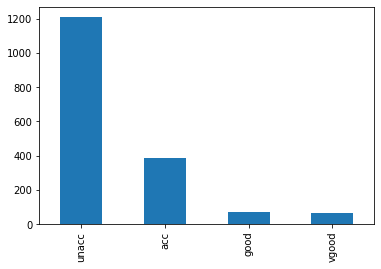

In [6]:
mis_decisiones.plot(kind = 'bar')

Luego vamos a ver que, a veces, es más fácil trabajar con números en lugar de categorias; que es lo que hacemos cuando trabajamos con <font color='green'>Dummy Variables</font>. Así que vamos a hacer una prueba y reemplazar el precio que son categorías por datos numéricos.

In [7]:
# Creamos las variables dummy de la columna que queramos, por ejemplo el precio que es la número 0
dummies = pd.get_dummies(data.iloc[:,0])
 
# Añadimos las dummies al dataframe
merged = pd.concat([data, dummies], axis='columns')

# A ver si funciona
merged.head()


,Precio,Coste de Mantenimiento,Número de puertas,Capacidad,Tamaño del maletero,Seguridad,Decisión,high,low,med,vhigh
0,vhigh,vhigh,2,2,small,low,unacc,0,0,0,1
1,vhigh,vhigh,2,2,small,med,unacc,0,0,0,1
2,vhigh,vhigh,2,2,small,high,unacc,0,0,0,1
3,vhigh,vhigh,2,2,med,low,unacc,0,0,0,1
4,vhigh,vhigh,2,2,med,med,unacc,0,0,0,1


In [8]:
# Bien, ahora añadimos una columna extra para el precio, pero en categoría númerica
merged['Precio'].replace(['low', 'med', 'high', 'vhigh'],
                         [    0,     1,      2,      3], 
                         inplace=True)

# De nuevo, a ver si funciona
merged.head()

,Precio,Coste de Mantenimiento,Número de puertas,Capacidad,Tamaño del maletero,Seguridad,Decisión,high,low,med,vhigh
0,3,vhigh,2,2,small,low,unacc,0,0,0,1
1,3,vhigh,2,2,small,med,unacc,0,0,0,1
2,3,vhigh,2,2,small,high,unacc,0,0,0,1
3,3,vhigh,2,2,med,low,unacc,0,0,0,1
4,3,vhigh,2,2,med,med,unacc,0,0,0,1


Y podemos crear gráficos un poco más elaborados, por ejemplo poniendo títulos.

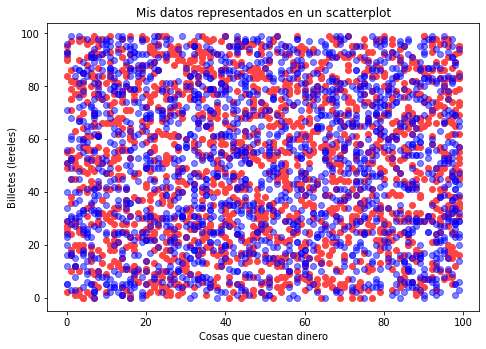

In [9]:
# Añadimos datos aleatorios
data['aleatoriosA'] = np.random.randint( 0, 100, size=(data.shape[0], 1))
data['aleatoriosB'] = np.random.randint( 0, 100, size=(data.shape[0], 1))
data['aleatoriosC'] = np.random.randint( 0, 100, size=(data.shape[0], 1))

# Creamos una nueva figura
figure_1 = plt.figure()

# Add axes
ax = figure_1.add_axes([0,0,1,1])

# Añadimos un par de nube de puntos de datos aleatorios
# -- Esta la definimos con un color hexadecimal que se acerca al rojo
ax.scatter(data['aleatoriosA'], data['aleatoriosC'], color='#FF4444')
# -- Esta la definimos con un color azul, pero transparente para poder ver los de detrás
ax.scatter(data['aleatoriosB'], data['aleatoriosC'], color='blue', alpha=0.5)
# Le ponemos nombre a los ejes de coordenadas
ax.set_xlabel('Cosas que cuestan dinero')
ax.set_ylabel('Billetes (lereles)')
# Le damos un título
ax.set_title('Mis datos representados en un scatterplot')
# Le decimos a python que muestre el gráfico
plt.show()

## 3 - Árbol de toma de decisiones


El problema más fácil de entender en machine learning es el árbol de decisiones. Tenemos un conjunto de datos que son coches, y queremos tomar la decisión de comprar un coche.


Por ejemplo, yo quiero comprar un Ferrari. ¿Tengo 1.000.000€?, no. Pues entonces mi decisión es no comprarlo. Es un árbol muy simple y fácil.


Vamos a ver un ejemplo más elaborado con nuestro conjunto de datos. En nuestro caso por ejemplo tenemos una encuesta a miles de clientes que nos dicen si un coche definido por una serie de variables (precio, seguridad, capacidad,...) es atractivo para ser comprado (decisión). Así que, diseñaremos un modelo nuevo, y el modelo nos dirá si la gente está dispuesto a comprarlo o no.

In [10]:
# Importamos las librearías para crear modelos de árbol de decisión
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import export_text

import seaborn as sns

In [ ]:
# Leemos los datos de nuevo, y reemplazamos todos las columnas por valores numéricos
data = pd.read_csv("/content/car.data", header = None)
data.columns = ['Precio', 'Coste de Mantenimiento', 'Número de puertas', 'Capacidad', 'Tamaño del maletero', 'Seguridad', 'Decisión']

# Antes de empezar a reemplazar cosas, me guardo unos nombres para más adelante
# -- El nombre de las columnas
nombres = data.columns
# -- El nombre de los valores de decisión
valores = data['Decisión'].unique()

In [11]:
# Reemplazamos datos
# -- Variables independientes
data['Precio'].replace(['low', 'med', 'high', 'vhigh'], [1,2,3,4], inplace=True)
data['Coste de Mantenimiento'].replace(['low', 'med', 'high', 'vhigh'], [1,2,3,4], inplace=True)
data['Número de puertas'].replace(['2', '3', '4', '5more'], [1,2,3,4], inplace=True)
data['Capacidad'].replace(['2', '4', 'more'], [1,2,3,], inplace=True)
data['Tamaño del maletero'].replace(['small', 'med', 'big'], [1,2,3,], inplace=True)
data['Seguridad'].replace(['low', 'med', 'high'], [1,2,3,], inplace=True)
# -- Variables dependientes
data['Decisión'].replace(['unacc', 'acc', 'good', 'vgood'], [1,2,2,2], inplace=True)

# Comprobar que todo va bien
data.head()

,Precio,Coste de Mantenimiento,Número de puertas,Capacidad,Tamaño del maletero,Seguridad,Decisión,aleatoriosA,aleatoriosB,aleatoriosC
0,4,4,1,1,1,1,1,71,35,88
1,4,4,1,1,1,2,1,16,85,87
2,4,4,1,1,1,3,1,18,62,32
3,4,4,1,1,2,1,1,44,75,47
4,4,4,1,1,2,2,1,48,76,37


En cualquier asignatura nos ponen problemas para que aprendamos, y luego nos ponen problemas en el examen para ver si hemos aprendido. Entonces dividimos nuestra relación de problemas en problemas para clase y problemas para el examen.

Si no ponemos problemas de pruebas, lo más probable es que el alumno suspenda. Y si ponemos muy poquitos problemas en el examen, no vamos a poder evaluar bien si el alumno ha aprendido o no; puede ser que saque un 10 de pura chiripa.

En Machine Learning sucede lo mismo. Nuestro modelo necesita problemas para aprender y problemas para ser evaluado. Por regla general guardamos un 80% de los datos para aprendizaje, y un 20% de los datos para evaluación. Esta regla cambia dependiendo del tipo de problema, tipo de datos, etc... pero por ahora lo dejamos así.

In [13]:
# Dividimos las variables, X dependientes, Y independientes.
dataset = data.values
X = dataset[:,0:6]
Y = np.asarray(dataset[:,6],dtype = 'S6')
# La estructura de estos datos puede parecer un poco rara, pero es lo que nos pide la biblioteca


# Dividimos en partes para aprendizaje, y partes para evaluar
# -- Test Size = 0.2 significa un 20% para evaluar
# -- Random State = 0 significa que divida de forma aleatoria, pero siempre igual para poder reproducir el problema de nuevo
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2, random_state=0)

Ahora hace falta entrenar el modelo. Lo que un alumno tarda varios semestres en aprender, esto lo hace en unos pocos segundos.

In [14]:
# Creamos el tipo de modelo que queremos, en nuestro caso, árbol de decisión.
# -- Max Depth es el límite de condiciones que ponemos, en teoría infinito, pero si no ponemos un límite el modelo entrena hasta el fin de los tiempos. 
tr = tree.DecisionTreeClassifier(max_depth=5)

# Entrenamos el modelo
tr.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=5)

Por último hace falta evaluar si nuestro modelo ha sido bien entrenado o no. Así que vamos a pasarle el examen, y ver lo que nos dice.

In [15]:
# Hacemos la predicción
y_pred = tr.predict(X_Test)

En esta variable lo que tenemos ahora es un conjunto de predicciones (respuestas de examen) que tenemos que comparar con la solución al examen que nos habíamos guardado antes.

Al resultado del examen con lo que llamamos F-Score, que es un valor que va de 0% a 100%. Sacar un 100% en el examen no significa que haya sido un buen examen, o que tengamos un buen modelo necesariamente. De hecho valores muy muy altos son sospechosos y quiere decir que era un examen muy fácil, o que todas las variables dependientes eran casi todas de una misma clase, o que apenas tenemos variabilidad, etc...

In [16]:
f1Score = tr.score(X_Test,Y_Test)
f1Score = f1Score * 100
f1Score = round(f1Score,2)
f1Score

91.91

Nos da un 96.82%, que es bastante bueno, y un poquito en el límite de ser demasiado bueno.

Podemos echar un vistazo dentro del algoritmo y ver como hace la clasificación. Por ejemplo, en nuestro caso, lo primero que hacen los clientes es fijarse en la seguridad, y a partir de ahí, decidir por un camino u otro:

In [17]:
valores = ["inaceptable","aceptable"]  

# Preparamos un diagrama de tamaño 60 x 20
plt.figure(figsize=(80,20))

# Le decimos a la librería que prepare el diagrama
# -- Con nuestro modelo tr
# -- Que incluya los nombres de las variables
# -- Que incluya el nombre de los valores de la variable dependiente
# -- Que redondee los números mostrados
# -- Que ponga colorines a las cajitas
# -- Y que el tamaño de letra no sea muy grande
a = tree.plot_tree(tr,
                   feature_names = nombres,
                   class_names = valores,
                   rounded = True,
                   filled = True,
                   fontsize=10)

plt.show()

NameError: ignored

<Figure size 5760x1440 with 0 Axes>

Otra cosa interesante que también podemos hacer es analizar la matriz de confusión del modelo. Nuestro resultado no es perfecto, y por tanto vamos a tener falsos positivos y falsos negativos de vez en cuando.

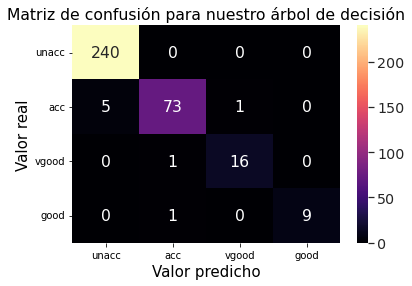

<Figure size 720x504 with 0 Axes>

In [ ]:
# Creamos la matriz de confusión.
confusion_matrix = metrics.confusion_matrix(Y_Test,  y_pred )

# Transformamos los resultados en un dataframe
matrix_df = pd.DataFrame(confusion_matrix)

# Creamos un nuevo diagrama
ax = plt.axes()

# Creamos un heatmap con una escala de colores llamada "magma"
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

# Título y ejes
ax.set_title('Matriz de confusión para nuestro árbol de decisión')
ax.set_xlabel("Valor predicho", fontsize =15)
ax.set_xticklabels(['']+valores)
ax.set_ylabel("Valor real", fontsize=15)
ax.set_yticklabels(list(valores), rotation = 0)

# Muestra el gráfico
plt.show()

Por último, vamos a repetir algo que ya hemos hecho, y es hacer una predicción de como se vendería nuestro nuevo diseño de coche. Pero ahora, en lugar de pasarle datos de entrenamiento o datos de examen, lo hacemos con un dato nuevo.

In [ ]:
# Vamos a ver como se vendería nuestro nuevo diseño en el mercado
# -- Es un poquito caro = 3
# -- Mantenimiento barato = 2
# -- Deportivo con 2 puertas = 1
# -- Capacidad para 2 personas = 1
# -- No tiene maletero = 1
# -- Es muy seguro = 3
Supercoche = [[3,2,1,1,1,3]]

tr.predict(Supercoche)

array([b'1'], dtype='|S6')

Nos ha devuelto un valor de 1, que equivale al valor "Inaceptable". Nuestro coche no lo quiere nadie :(

## 4 - Redes neuronales

No hay ninguna forma fácil de explicar lo que son las redes neuronales. Yo os recomiendo que os veáis estos vídeos, que están en inglés pero podéis poner subtítulos en español, para empezar a conceptualizar la principal idea detrás de las redes neuronales:

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1

https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2

https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3

https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4

Y esto es un pequeño juguete para visualizar lo que está pasando dentro de una red neuronal.

https://playground.tensorflow.org/



Igual que antes, importamos las librerías que hacen falta.

In [18]:
import tensorflow as tf
import numpy as np

También necesitamos unos datos, para nuestro modelo simple, vamos a escribirlos aquí directamente en lugar de importarlos de alguna parte.

En este ejemplo vamos a crear una red neuronal que lee grados en Celcius, y devuelve grados Faranheit. Esto es un poco tonto porque ya sabemos convertirlo de uno a otro de forma analítica con un 100% de precisión, pero no está mal para aprender usando un ejemplo tonto.

In [19]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

También necesitamos crear una red. En nuestro caso usamos Keras, que es parte de la biblioteca de Tensorflow. Keras simplemente se encarga de crear capas y neuronas de acuardo a lo que le digamos.

In [20]:
# Crear una red con una entrada y una salida (mínima red posible)
capa = tf.keras.layers.Dense( units = 1, input_shape=[1] )
# Crear un modelo secuencial a partir de nuestra red neuronal (modelo más simple)
modelo = tf.keras.Sequential([capa])

# Por último compilamos el modelo, esto no tiene nada que ver con las matemáticas
# de una red neuronal, sino más bien como se programan, y tengo que decirle algunas
# propiedades para que sea capaz de aprender bien.
#
# ---- Utilizamos un optimizador llamado Adam, que es uno de muchos, que busca mínimos locales de forma eficiente
# ---- Para la función de pérdida usamos el error cuadrático medio, que básicamente indica que pocos errores grandes es peor que muchos errores pequeñitos
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = "mean_squared_error"
)

Ahora hace falta entrenar el modelo, igual que hacíamos antes con el árbol. Peeeero, aquí no dividimos en parte para entrenamiento o parte para examen. En nuestro conjunto de datos, tenemos infinítos números en Celsius para probar a ver si funcionan en Faranheit, así que no tiene sentido.

In [21]:
print("Comenzando a entrenar...")
# Aquí le decimos que haga 1000 sesiones de entrenamiento, y que se calle y no de información de que pasa mientras entrena
historial = modelo.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Entrenamiento concluido")

Comenzando a entrenar...
Entrenamiento concluido


A cada vuelta que da el modelo debería de mejorar. Veamos como de seguro está el modelo en cada vuelta que dió, lo mismo lo hemos entrenado durante demasiado tiempo y no hacía falta tanto.

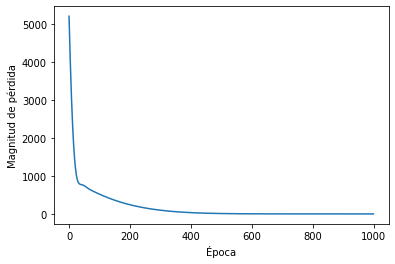

In [22]:
plt.xlabel("Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Pues parece ser que a partir de la 600 más o menos la cosa no mejora nada. Aquí da igual, pero para modelos mucho más grandes, el gasto computacional es importante.

Vale. El modelo está muy seguro de si mismo, veamos si es capaz de transformar ºC en ºF. Recordemos que la fórmula es:

\begin{align}
        Farenheit = Celsius \cdot \frac{9}{5} + 32
\end{align}

Vamos a probar a darle 35ºC, según la fórmula deberían ser:

(35°C × 9/5) + 32 = 95°F


In [23]:
# Ojo que tenemos que darle un array de tamaño 1, [35]
resultado = modelo.predict([35.0])
print(resultado)

[[94.853165]]


Pues queda bastante cerca de la realidad. La red neuronal ha sido capaz de aprender ella sola a calcular farenheits con mucha precisión sin necesidad de que le enseñemos la fórmula. De hecho podemos ver los pesos y sesgos de la red neuronal:

In [24]:
# A ver como se ha construido la red por si sóla
print(capa.get_weights())

[array([[1.7982888]], dtype=float32), array([31.91306], dtype=float32)]


Fíjate que:

9/5 = 1.8 es muy parecido al primer resultado.

32 es muy parecido al segundo resultado.

Los pesos y sesgos de esta red son tan buenos que es casi una copia perfecta de la fórmula.

Hasta aquí es muy fácil entender como se comporta la red y todos sus mecanismos internos, ¿pero qué pasa si entrenamos una red con varias capas ocultas y muchos más neurones?

Comenzando a entrenar...
Entrenamiento concluido


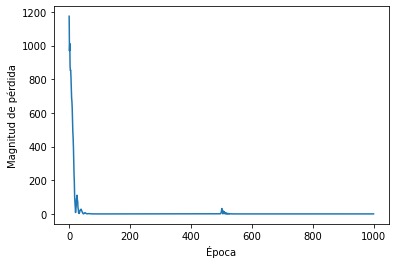

In [25]:
# Crear una capa oculta intermedia con 3 neurones y una única entrada (capa de entrada)
ocultaA = tf.keras.layers.Dense(units = 3, input_shape=[1])
# Crear una capa oculta intermedia con 3 neurones
ocultaB = tf.keras.layers.Dense(units = 3)
# Crear la capa de salida con un único neurón
salida = tf.keras.layers.Dense(units = 1)

# Crear un modelo secuencial a partir de nuestras capas
modelo = tf.keras.Sequential([ocultaA, ocultaB, salida])

# Compilamos el modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = "mean_squared_error"
)

# Entrenamos el modelo (¡fíjate que tarda más en entrenar!)
print("Comenzando a entrenar...")
historial = modelo.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Entrenamiento concluido")

# Veamos como ha entrenado de bien
plt.xlabel("Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Fíjate que ha tardado más en entrenar, pero ahora después de unas 20 vueltas ya ha llegado al resultado óptimo, cuando antes tardaba 600. Nos podemos ahorrar mucho más tiempo de entrenamiento que antes. Veamos la predicción.

In [ ]:
resultado = modelo.predict([35.0])
print(resultado)

[[94.880745]]


Nuevamente los resultados son muy buenos, pero veamos ahora como está construida la red internamente...

In [ ]:
# A ver como se ha construido la red por si sóla ahora
print(ocultaA.get_weights())
print(ocultaB.get_weights())
print(salida.get_weights())

[array([[-0.91432965, -0.37186486,  0.26768956]], dtype=float32), array([-4.930576 , -0.9478731, -4.755057 ], dtype=float32)]
[array([[-0.3676066 , -1.9082539 ,  1.4369408 ],
       [-0.10955471,  0.31175706, -0.13078482],
       [ 0.5135643 , -0.9231404 ,  1.2229657 ]], dtype=float32), array([-0.9264095,  3.9275239, -3.470162 ], dtype=float32)]
[array([[-0.17642684],
       [ 0.8817286 ],
       [-0.71482474]], dtype=float32), array([4.7141256], dtype=float32)]


Pues aquí está la nueva fórmula que la red a inventado por si misma. Un galimatías total de matrices y vectores que nadie entiende, pero que por arte de magia, resulta que funciona como debería.

## 5 - Redes neuronales convolucionales (to be continue...)